In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

Using TensorFlow backend.


In [2]:
with open('data_batch_1', 'rb') as f:
    batch_1 = pickle.load(f, encoding='bytes')

In [3]:
batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [4]:
labels = batch_1[b'labels']
labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [5]:
batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [6]:
batch_1[b'data'].shape

(10000, 3072)

In [7]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')
# Breaking the 3,072 samples of each single image into thirds, which 
# correspond to Red, Green, Blue channels 
for idx, img in enumerate(batch_1[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

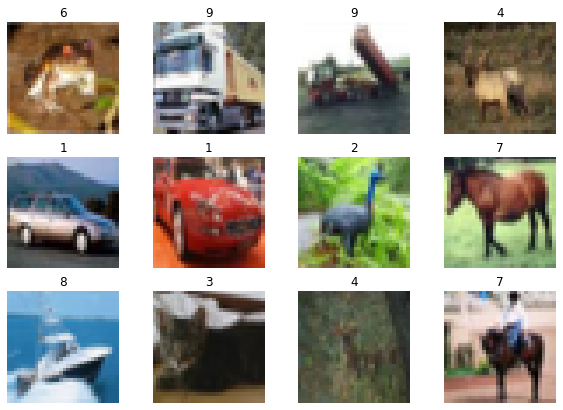

In [8]:
plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

In [9]:
with open('batches.meta', 'rb') as f:
    label_strings = pickle.load(f, encoding='bytes')
    
label_strings

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [10]:
actual_labels = [label.decode() for label in label_strings[b'label_names']]
actual_labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [11]:
for lab in labels[:12]:
    print(actual_labels[lab], end=', ')

frog, truck, truck, deer, automobile, automobile, bird, horse, ship, cat, deer, horse, 

In [12]:
one_hot_labels = np.zeros((images.shape[0], 10))

for idx, lab in enumerate(labels):
    one_hot_labels[idx, lab] = 1

In [13]:
one_hot_labels[:12]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [14]:
images = images.mean(axis=-1)

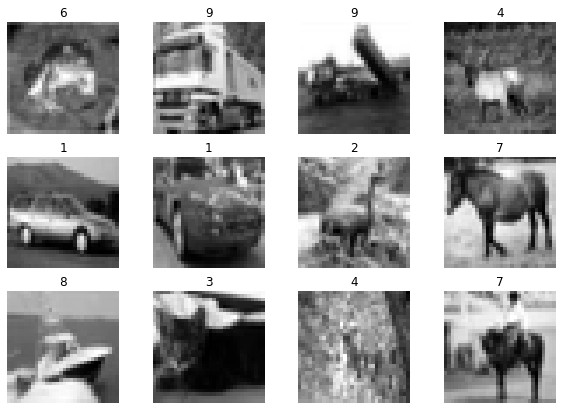

In [15]:
plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

In [16]:
images /= 255.

In [17]:
images = images.reshape((-1, 32 ** 2))

In [18]:
x_train = images[:7000]
y_train = one_hot_labels[:7000]

x_test = images[7000:]
y_test = one_hot_labels[7000:]

In [19]:
model = Sequential([
    Dense(500, input_shape=(1024,), activation='relu'),
    Dense(10, activation='softmax')
    
])

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), shuffle = False)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 9s 1ms/step - loss: 2.2060 - acc: 0.1989 - val_loss: 2.0793 - val_acc: 0.2457
Epoch 2/100
7000/7000 [==============================] - 5s 730us/step - loss: 2.0658 - acc: 0.2426 - val_loss: 2.0385 - val_acc: 0.2673
Epoch 3/100
7000/7000 [==============================] - 5s 737us/step - loss: 2.0014 - acc: 0.2697 - val_loss: 2.0138 - val_acc: 0.2673
Epoch 4/100
7000/7000 [==============================] - 5s 734us/step - loss: 1.9553 - acc: 0.2920 - val_loss: 1.9780 - val_acc: 0.2910
Epoch 5/100
7000/7000 [==============================] - 5s 741us/step - loss: 1.9146 - acc: 0.3100 - val_loss: 1.9675 - val_acc: 0.2910
Epoch 6/100
7000/7000 [==============================] - 5s 735us/step - loss: 1.8811 - acc: 0.3247 - val_loss: 1.9594 - val_acc: 0.2987
Epoch 7/100
7000/7000 [==============================] - 5s 740us/step - loss: 1.8519 - acc: 0.3346 - val_loss: 1.9361 - val_acc: 0.

7000/7000 [==============================] - 5s 706us/step - loss: 1.0181 - acc: 0.6509 - val_loss: 2.3831 - val_acc: 0.3307
Epoch 61/100
7000/7000 [==============================] - 5s 694us/step - loss: 1.0120 - acc: 0.6510 - val_loss: 2.4069 - val_acc: 0.3257
Epoch 62/100
7000/7000 [==============================] - 5s 690us/step - loss: 0.9962 - acc: 0.6560 - val_loss: 2.4315 - val_acc: 0.3337
Epoch 63/100
7000/7000 [==============================] - 5s 699us/step - loss: 0.9901 - acc: 0.6571 - val_loss: 2.4478 - val_acc: 0.3320
Epoch 64/100
7000/7000 [==============================] - 5s 690us/step - loss: 0.9794 - acc: 0.6640 - val_loss: 2.4630 - val_acc: 0.3320
Epoch 65/100
7000/7000 [==============================] - 5s 701us/step - loss: 0.9739 - acc: 0.6679 - val_loss: 2.4854 - val_acc: 0.3320
Epoch 66/100
7000/7000 [==============================] - 5s 692us/step - loss: 0.9506 - acc: 0.6801 - val_loss: 2.5139 - val_acc: 0.3287
Epoch 67/100
7000/7000 [=======================

In [25]:
predictions = model.predict(images[:12])
predictions

array([[8.2426687e-04, 1.9769844e-02, 1.3154600e-04, 1.7852411e-01,
        2.0686911e-01, 5.6794225e-03, 5.0732917e-01, 9.0836524e-04,
        7.9949051e-02, 1.5147775e-05],
       [1.1431259e-06, 7.5865492e-02, 7.0075362e-07, 3.0784035e-04,
        1.7017168e-08, 3.2263887e-03, 2.8468296e-06, 1.2712204e-03,
        2.3498660e-02, 8.9582562e-01],
       [5.1413889e-07, 1.3860208e-07, 1.7348151e-08, 9.3050639e-06,
        1.1070193e-07, 8.7996384e-08, 2.4442379e-08, 8.3750974e-06,
        8.5207148e-06, 9.9997294e-01],
       [1.8286852e-02, 6.4492985e-03, 1.7885046e-01, 1.9191353e-02,
        7.5285876e-01, 2.7415346e-04, 2.3039132e-03, 1.9792159e-04,
        2.1585245e-02, 2.0951588e-06],
       [3.0686788e-03, 8.6890823e-01, 5.7748322e-09, 2.6816693e-07,
        8.4346098e-08, 4.9803628e-09, 8.9698729e-14, 1.4195305e-07,
        1.2738889e-01, 6.3358812e-04],
       [3.3242475e-02, 5.4924262e-01, 1.2958751e-02, 1.5084515e-02,
        1.1913211e-02, 7.2970563e-03, 4.6956107e-02, 4.36

In [26]:
np.argmax(predictions, axis=1)

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7], dtype=int64)

In [27]:
labels[:12] 

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7]